# 0.Import section

In [1]:
from sys import exit
import importlib

from astropy.io.votable import is_votable, parse
from astropy.table import Table, vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
import numpy as np
            
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
from matplotlib.markers import MarkerStyle

from stage2 import *

# 1.DATA TREATMENT SECTION

## Checking that file format is correct

In [2]:
pathdata = "outputs/"
data     = ["matching_fieldGals_Cassata_and_Zurich_corrected_radius.vot"]

for name in data:
    voTag = is_VOtable(pathdata+name)
    if voTag:        
        fullFileName = pathdata + name
        #Retrieving the data
        table = parse(fullFileName)
        full  = table.get_first_table()
        
        print("Size of", name, "is", full.array.shape[0], "\n")
    else:
        exit("Exiting")

The file outputs/matching_fieldGals_Cassata_and_Zurich_corrected_radius.vot is a VOtable, right ? True
Size of matching_fieldGals_Cassata_and_Zurich_corrected_radius.vot is 284 



## Getting data

In [3]:
catalog = parse(pathdata+data[0]).get_first_table().array
fields  = np.asarray(catalog.dtype.names)

#Checking that the matching procedure did not duplicate galaxies
checkDupplicates([catalog], names=["matching_fieldGals_Cassata_and_Zurich_corrected_radius.vot"])

#Converting to an astropy table for simplicity
table = Table(catalog)      

printSimpleStat(catalog['Separation_ZURICH'], unit=u.arcsec)
print("\nNumber of galaxies in matching catalog:", np.shape(table)[0])

All the galaxies are only listed once in the catalog matching_fieldGals_Cassata_and_Zurich_corrected_radius.vot
Stat for catalog number 0 :
Maximum separation is 0.66913126003908 arcsec.
Mean separation is -3591.127800158525 arcsec.
Median separation is 0.03882939124261448 arcsec.
1st quantile is -9999.0.
3rd quantile is 0.08583675333021239.

Number of galaxies in matching catalog: 284


## 1.1 Correlation between Flux(OII) and SNR

### 1.1.1 Getting OII flux and flux error to compute SNR

In [4]:
redshift = table['Z_MUSE']
fluxOII = table['OII_3726_FLUX'] + table['OII_3729_FLUX']
errflux = table['OII_3726_FLUX_ERR'] + table['OII_3729_FLUX_ERR']

### 1.1.2 Checking and removing nan values in tables

In [5]:
m = maskToRemoveVal([fluxOII, errflux], astroTableMask=True)
m = np.logical_and(m, maskToRemoveVal([fluxOII, errflux]))

fluxOII, errflux, redshift = applyMask([fluxOII, errflux, redshift], m)

findWhereIsValue([fluxOII, errflux])

No nan was found in array number 0
No nan was found in array number 1


[False, False]

### 1.1.3 Computing SNR

In [6]:
SNR     = fluxOII/errflux

### 1.1.4 Plotting Flux(OII) vs SNR

File Plots/Selection_plots/Flux_vs_SNR.pdf already exists but overwritting was disabled. Thus exiting without writing.


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa4e80c7198>,
 <matplotlib.collections.PathCollection at 0x7fa4e86af2e8>)

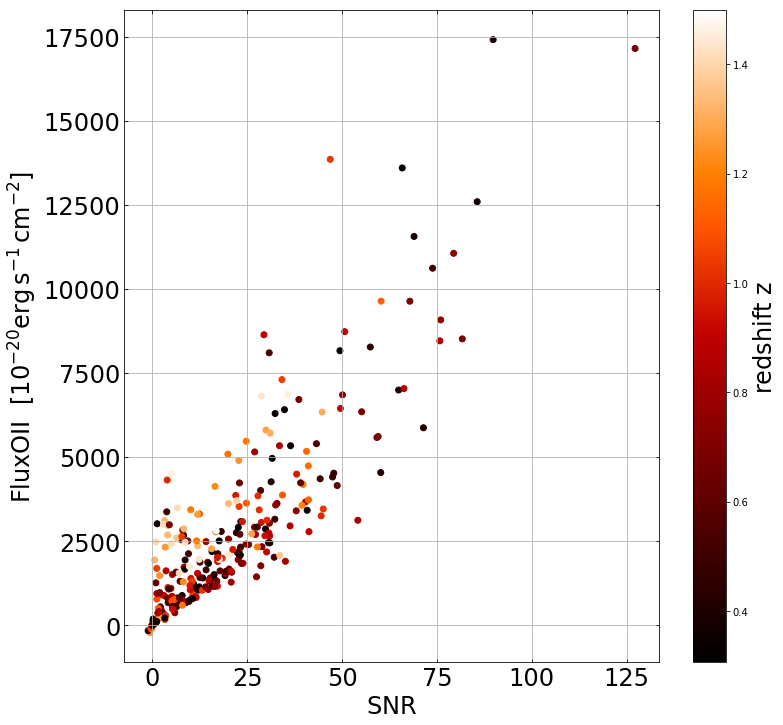

In [7]:
plt.rcParams["figure.figsize"] = (12, 12) # (w, h)
f = plt.figure()
plt.subplots_adjust(wspace=0.45, hspace=0.05)

asManyPlots(111, SNR, fluxOII, xlabel=r'$\rm{SNR}$', ylabel=r'$\rm{Flux OII \ \ [10^{-20} erg \, s^{-1} \, cm^{-2}]}$',
            plotFlag=False, color=[redshift], marker='o', cmap='gist_heat', 
            showColorbar=True, colorbarLabel=r'$\rm{redshift \,\, z}$',
            outputName='Plots/Selection_plots/Flux_vs_SNR.pdf', overwrite=False)

## 1.2 Plotting size agains mass

### 1.2.1 Getting data

In [8]:
#Converting size in arcsec
size                  = table['Corrected_radius']*0.03
redshift              = table['Z_MUSE']
lmass                 = table['lmass']

### 1.2.2 Removing nans and masked elements

In [9]:
m                     = np.logical_and(maskToRemoveVal([size, lmass], astroTableMask=True),
                                       maskToRemoveVal([size, lmass]))
size, lmass, redshift = applyMask([size, lmass, redshift], m)

findWhereIsValue([size, lmass])

No nan was found in array number 0
No nan was found in array number 1


[False, False]

### 1.2.4 Plotting

File Plots/Selection_plots/size_vs_log10Mass.pdf already exists but overwritting was disabled. Thus exiting without writing.


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa4e88467f0>,
 [<matplotlib.lines.Line2D at 0x7fa4e818d320>])

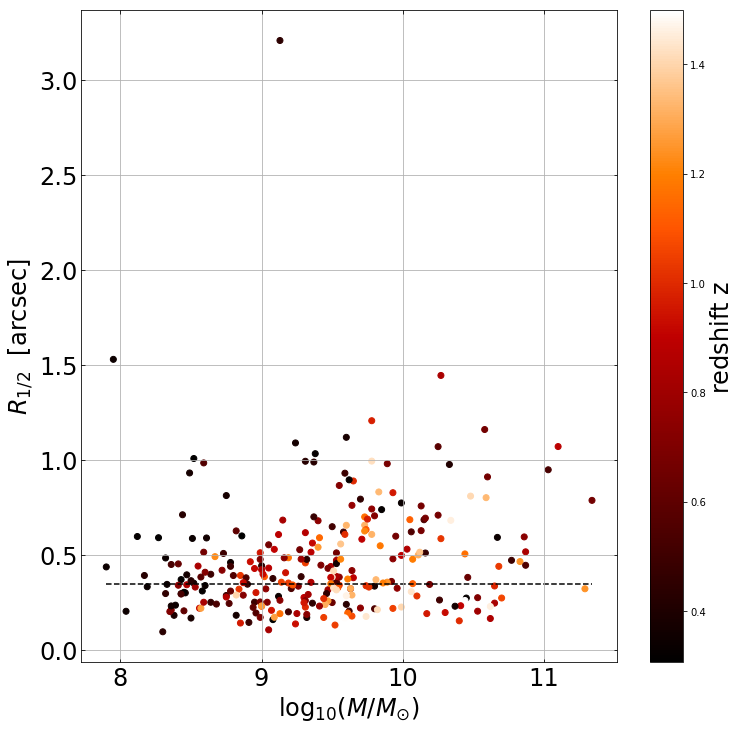

In [11]:
plt.rcParams["figure.figsize"] = (12, 12) # (w, h)
f = plt.figure()
plt.subplots_adjust(wspace=0.45, hspace=0.05)

xline = [np.min(lmass), np.max(lmass)]
yline = [0.35, 0.35]
asManyPlots(111, [lmass, xline], [size, yline], xlabel=r'$\log_{10} (M/M_{\odot})$', ylabel=r'$R_{1/2} \ \ [\rm{arcsec}]$',
            plotFlag=[False, True], color=[redshift, 'black'], marker=['o', 'None'], linestyle=["None", 'dashed'],
            cmap='gist_heat', showColorbar=True, colorbarLabel=r'$\rm{redshift \,\, z}$',
            outputName='Plots/Selection_plots/size_vs_log10Mass.pdf', overwrite=False)

## 1.3 SNR vs size

### 1.3.1 Getting data and Computing SNR

In [12]:
redshift = table['Z_MUSE']

#Converting size in arcsec
size    = table['Corrected_radius']*0.03

fluxOII = table['OII_3726_FLUX'] + table['OII_3729_FLUX']
errflux = table['OII_3726_FLUX_ERR'] + table['OII_3729_FLUX_ERR']

m       = np.logical_and(maskToRemoveVal([fluxOII, errflux, size], astroTableMask=True),
                         m, maskToRemoveVal([fluxOII, errflux, size]))

size, fluxOII, errflux, redshift = applyMask([size, fluxOII, errflux, redshift], m)

findWhereIsValue([fluxOII, errflux, size])

SNR     = fluxOII/errflux

No nan was found in array number 0
No nan was found in array number 1
No nan was found in array number 2


### 1.3.2 Plotting SNR vs size (in arcsec)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa4e5ba44e0>,
 [<matplotlib.lines.Line2D at 0x7fa4e5885588>])

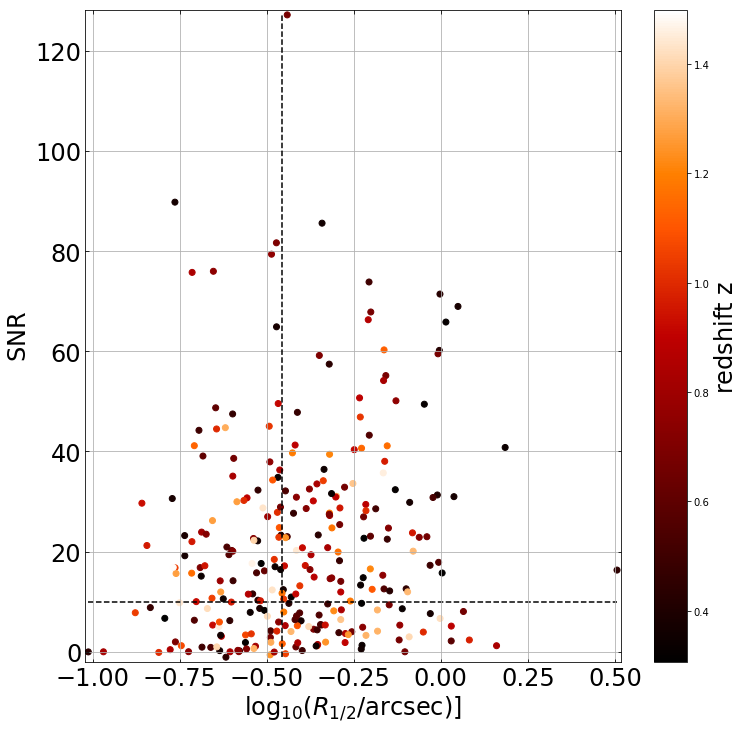

In [25]:
plt.rcParams["figure.figsize"] = (12, 12) # (w, h)
f = plt.figure()
plt.subplots_adjust(wspace=0.45, hspace=0.05)

lsize =  np.log10(size)

SNRLineX = [np.min(lsize), np.max(lsize)]
SNRLineY = [10, 10]

lszLineX = [np.log10(0.35), np.log10(0.35)]
lszLineY = [np.min(SNR), np.max(SNR)]

asManyPlots(111, [lsize, SNRLineX, lszLineX], [SNR, SNRLineY, lszLineY], 
            ylabel=r'$\rm{SNR}$', xlabel=r'$\log_{10} (R_{1/2} / \rm{arcsec})]$',
            plotFlag=[False, True, True], color=[redshift, 'k', 'k'], zorder=[0,1,2],
            marker=['o', 'None', 'None'], linestyle=['None', 'dashed', 'dashed'],
            cmap='gist_heat', showColorbar=True, colorbarLabel=r'$\rm{redshift \,\, z}$',
            outputName='Plots/Selection_plots/SNR_vs_R_halfLight_arcsec.pdf', overwrite=False,
            xlim=[np.min(lsize)-0.01, np.max(lsize)+0.01],
            ylim=[np.min(SNR)-1, np.max(SNR)+1])

### 1.3.3 Plotting SNR vs comoving transverse distance

In [26]:
plt.rcParams["figure.figsize"] = (12, 12) # (w, h)
f = plt.figure()
plt.subplots_adjust(wspace=0.45, hspace=0.05)

redshift = table['Z_MUSE']

#Converting size in arcsec
size    = table['Corrected_radius']*0.03

fluxOII = table['OII_3726_FLUX'] + table['OII_3729_FLUX']
errflux = table['OII_3726_FLUX_ERR'] + table['OII_3729_FLUX_ERR']

m       = np.logical_and(maskToRemoveVal([fluxOII, errflux, size], astroTableMask=True),
                         m, maskToRemoveVal([fluxOII, errflux, size]))

size, fluxOII, errflux, redshift = applyMask([size, fluxOII, errflux, redshift], m)

findWhereIsValue([fluxOII, errflux, size])

SNR     = fluxOII/errflux

No nan was found in array number 0
No nan was found in array number 1
No nan was found in array number 2


In [27]:
from cosmolopy.distance import comoving_distance_transverse

cosmo = {'omega_M_0' : 0.3, 'omega_lambda_0' : 0.7, 'omega_k_0' : 0.0, 'h' : 0.72}

#Transforming from arcsec to radians
size /= 3600 #arcsec to degrees
size *= np.pi/180.0 #degrees to radians

#Transforming angular size in comsological transverse size
size *= comoving_distance_transverse(redshift, **cosmo)
size *= 1.0e3 #Mpc to kpc

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa4dfd100b8>,
 [<matplotlib.lines.Line2D at 0x7fa4e41afb00>])

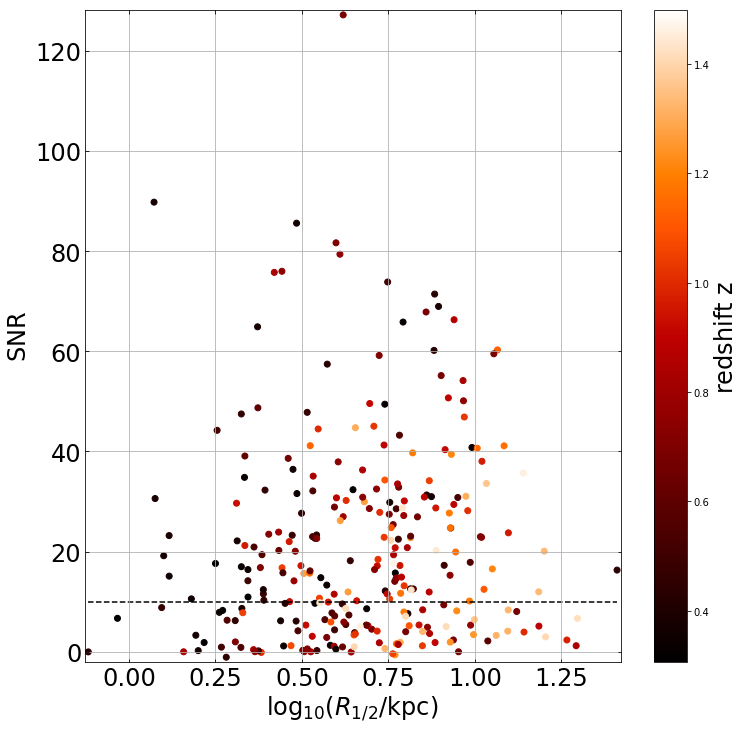

In [31]:
lsize =  np.log10(size)

SNRLineX = [np.min(lsize), np.max(lsize)]
SNRLineY = [10, 10]

asManyPlots(111, [lsize, SNRLineX, lszLineX], [SNR, SNRLineY, lszLineY], 
            ylabel=r'$\rm{SNR}$', xlabel=r'$\log_{10}(R_{1/2} / \rm{kpc})$',
            plotFlag=[False, True, True], color=[redshift, 'k', 'k'], zorder=[0,1,2],
            marker=['o', 'None', 'None'], linestyle=['None', 'dashed', 'dashed'],
            cmap='gist_heat', showColorbar=True, colorbarLabel=r'$\rm{redshift \,\, z}$',
            outputName='Plots/Selection_plots/SNR_vs_R_halfLight_kpc.pdf', overwrite=False,
            xlim=[np.min(lsize)-0.01, np.max(lsize)+0.01],
            ylim=[np.min(SNR)-1, np.max(SNR)+1])

## 1.4 Redshift histograms

## 1.5 SFR vs mass

In [ ]:
plt.rcParams["figure.figsize"] = (16, 12) # (w, h)
f = plt.figure()
plt.subplots_adjust(wspace=0.45, hspace=0.05)

#custom color map for gals with morpho
newcmap, norm = from_levels_and_colors([0.5, 1.5, 2.5, 3.5], ['blue', 'green', 'red'])

cmin = np.min([np.min(tableMatch['Z_MUSE']), np.min(galsWithoutMorpho['Z_MUSE'])])
cmax = np.max([np.max(tableMatch['Z_MUSE']), np.max(galsWithoutMorpho['Z_MUSE'])])

# ax1, tmp = asManyPlots(121, [tableMatch['lmass'], galsWithoutMorpho['lmass']], 
#                        [tableMatch['lsfr'], galsWithoutMorpho['lsfr']],
#                        label=['With morpho', 'Without morpho'], showLegend=True,
#                        xlabel=r'$\log_{10} ( M/M_{\odot})$', ylabel=r'$\log_{10} (\rm{SFR}/(M_{\odot} \rm{yr}^{-1}))$',
#                        marker=['o', 'x'], zorder=[1, 2], 
#                        color=[tableMatch['Z_MUSE'], galsWithoutMorpho['Z_MUSE']], plotFlag=[False, False],
#                        cmapMin=cmin, cmapMax=cmax,
#                        cmap='plasma', title='Without z-correction')

# xdata = [0.83*(tableMatch['lmass']-1.0)+1.74*np.log10(1.0+tableMatch['Z_MUSE']), 
#          0.83*(galsWithoutMorpho['lmass']-1.0)+1.74*np.log10(1.0+galsWithoutMorpho['Z_MUSE'])]
ydata = [tableMatch['lsfr']-1.74*np.log10((1.0+tableMatch['Z_MUSE'])/1.55),
         galsWithoutMorpho['lsfr']-1.74*np.log10((1.0+galsWithoutMorpho['Z_MUSE'])/1.55)]
ax1, tmp = asManyPlots(111, [tableMatch['lmass'], galsWithoutMorpho['lmass']], 
                       ydata, 
                       ylabel=r'$\log_{10} (\rm{SFR}/(M_{\odot} \rm{yr}^{-1})) - 1.74 \log_{10} \left ( \frac{1+z}{1+055} \right )$',
                       xlabel=r'$\log_{10} ( M/M_{\odot})$',
                       marker=['o', 'x'], zorder=[1, 2], colorbarLabel=r'$\rm{redshift \,\, z}$',
                       cmapMin=cmin, cmapMax=cmax, showColorbar=True, plotFlag=[False, False],
                       color=[tableMatch['Z_MUSE'], galsWithoutMorpho['Z_MUSE']],
                       cmap='plasma', title='With z-correction', 
                       label=['With morpho', 'Without morpho'], showLegend=True)

print("Data from matching catalog\nWithout correction: scatter =", np.std(tableMatch['lsfr']), 
      "dex\nWith correction: scatter =", np.std(tableMatch['lsfr']-1.74*np.log10((1.0+tableMatch['Z_MUSE'])/1.55)),
      "dex\n\nData from MUSE catalog\nWithout correction: scatter =", np.std(galsWithoutMorpho['lsfr']),
      "dex\nWith correction: scatter =", np.std(galsWithoutMorpho['lsfr']-1.74*np.log10((1.0+galsWithoutMorpho['Z_MUSE'])/1.55)),
      "dex")

# plt.savefig('Plots/SFR_versus_mass.pdf')
# plt.savefig('Plots/SFR_versus_mass_zCorrectedOnly.pdf')

# 2.BUILDING A TABLE OF FIELD GALS WITH CASSATA AND/OR ZURICH HALF-LIGHT RADIUS COUNTERPART AND ADDING A NEW COLUMN WHICH IS EITHER ZURICH RADIUS OR BIAS CORRECTED CASSATA RADIUS

## Getting data

In [ ]:
pathdata = "outputs/"
data     = ["matching_fieldGals_with_Cassata_and_Zurich_acc_1_arcsec.vot", 
            "matching_fieldGals_with_Cassata_acc_1_arcsec.vot"]

#Checking that file format is correct
for name in data:
    voTag = is_VOtable(pathdata+name)
    if voTag:        
        fullFileName = pathdata + name
        #Retrieving the data
        table = parse(fullFileName)
        full  = table.get_first_table()
        
        print("Size of", name, "is", full.array.shape[0], "\n")
    else:
        exit("Exiting")

In [ ]:
matchWithCassata       = parse(pathdata+data[1]).get_first_table().array
matchWithZurichCassata = parse(pathdata+data[0]).get_first_table().array

#Checking that the matching procedure did not duplicate galaxies
checkDupplicates([matchWithZurichCassata, matchWithCassata], 
                 names=["matching_fieldGals_with_Cassata_and_Zurich_acc_1_arcsec.vot", 
                        "matching_fieldGals_with_Cassata_acc_1_arcsec.vot"])

In [ ]:
#Converting to an astropy table for simplicity
tableMatchBoth = Table(matchWithZurichCassata)        
tableMatchCass = Table(matchWithCassata)

#Checking that the maximum angular separation is less than 1 arcsec in the matching tables
printSimpleStat([tableMatchBoth['Separation_ZURICH'], tableMatchCass['Separation_CASSATA']])

#Remove galaxies which have wrong ID_Laigle_16 values (9999)
tableMatchBoth = tableMatchBoth[tableMatchBoth['ID_Laigle_16'] != 9999]
tableMatchCass = tableMatchCass[tableMatchCass['ID_Laigle_16'] != 9999]

findWhereIsValue([tableMatchCass['ID_Laigle_16'], tableMatchBoth['ID_Laigle_16']], 9999)

#Remove the galaxy counted twice in the arrays
uniqueArr([tableMatchBoth, tableMatchCass], [tableMatchBoth['ID_Laigle_16'], tableMatchCass['ID_Laigle_16']])

print("\nNumber of galaxies in matching catalog with Cassata:", np.shape(tableMatchCass)[0], 
      "\nNumber of galaxies in matching catalog with Cassata & Zurich:", np.shape(tableMatchBoth)[0])

In [ ]:
#Get a subtable with galaxies having Cassata radius only
mask            = np.in1d(tableMatchCass['ID_Laigle_16'], tableMatchBoth['ID_Laigle_16'], 
                        assume_unique=True, invert=True)
tableCassOnly   = tableMatchCass[mask]

#Keep list of fields which appear in Cassata+Zurich matching catalog but not in Cassata matching catalog
m               = np.in1d(tableMatchBoth.dtype.names, tableCassOnly.dtype.names, assume_unique=True, invert=True)
listFieldsToAdd = np.asarray(tableMatchBoth.dtype.names)[m]

#Adding Zurich columns (default value=-999) to the Table with galaxies in Cassata catalog only
sz = np.shape(tableCassOnly)[0]
for field in listFieldsToAdd:
    tableCassOnly[field] = np.array([-9999]*sz, dtype=tableMatchBoth.dtype[field])

#Correcting biais in Cassata radius
offset         = -3.495e-1
A              = 1.95e-3
R_half_CASSATA = tableCassOnly['R_HALF_CASSATA']/(1+offset+A*tableCassOnly['R_HALF_CASSATA'])

#Creating new column in both tables
newField                 = 'Corrected_radius'
tableMatchBoth[newField] = tableMatchBoth['R50_ZURICH']
tableCassOnly[newField]  = R_half_CASSATA

## Concatenating tables

In [ ]:
newTable = vstack([tableMatchBoth, tableCassOnly], join_type='exact')

## Writing the full table in a new file

In [ ]:
path       = 'outputs/'
outputFile = 'matching_fieldGals_Cassata_and_Zurich_corrected_radius.vot'
# write_array_to_vot(newTable, path+outputFile, isTable=True)